In [1]:
import json
import os.path as osp
import numpy as np
from matplotlib import pyplot as plt
import pickle as pkl

In [2]:
def get_smpl_params(subject_list, annot_dir):
    smpl_params = {}
    for subject in subject_list:
        with open(osp.join(annot_dir, 'Human36M_subject' + str(subject) + '_smpl_param.json'), 'r') as f:
            smpl_params[str(subject)] = json.load(f)
    return smpl_params

In [3]:
def get_shape_array_h36m(subject, smpl_params):
    shape_subject = []
    for act in sorted(smpl_params[subject].keys()):
        for subact in sorted(smpl_params[subject][act].keys()):
            for frame in sorted(smpl_params[subject][act][subact].keys()):
                shape = np.array(smpl_params[subject][act][subact][frame]['shape'])
                #shape[(np.abs(shape) > 3).any(axis=0)] = 0.
                shape_subject.append(shape)        
    return np.array(shape_subject)

In [168]:
def plot_shapes_h36m(smpl_params, x, y, save_plot=False):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(1, 1, 1)
    plt.title('shapes of all subjects')
    plt.style.use('seaborn-deep')

    x_min = y_min = np.Inf
    x_max = y_max = - np.Inf
    for subject in smpl_params.keys():
        shape_subject = get_shape_array_h36m(subject, smpl_params).T[[x,y]].T
        shape_mean = shape_subject.mean(axis=0)
        shape_std = shape_subject.std(axis=0)
        x_min, y_min = np.min([np.array([x_min, y_min]), shape_mean - 2*shape_std], axis=0)
        x_max, y_max = np.max([np.array([x_max, y_max]), shape_mean + 2*shape_std], axis=0)
        plt.plot(shape_subject[:,0], shape_subject[:,1], '.', label=f'subject:{subject}') 
    plt.xlim([int(x_min), int(x_max+1)])
    plt.ylim([int(y_min), int(y_max+1)])
    ax.set_axisbelow(True)
    plt.grid(True)
    plt.xlabel(f'PC {x+1} coefs.')
    plt.ylabel(f'PC {y+1} coefs.')
    plt.legend()
    if save_plot:
        plt.savefig("/Users/clara/Desktop/UNI/2021_SS/BA_HMR/Plots_shape/shape_h36m.pdf", bbox_inches='tight')
    plt.show()
    

In [172]:
def hist_shapes_h36m(subjects, smpl_params, pcs, save_plot=False):
    n_plots = len(subjects)
    fig = plt.figure(figsize=(12*n_plots, 8))
    for idx, subject in enumerate(subjects):
        ax = fig.add_subplot(1, n_plots, idx+1)
        plt.title(f'Shapes of subject {subject}')
        shape_subject = get_shape_array_h36m(subject, smpl_params).T[[pcs]]
        shape_mean = shape_subject.mean(axis=1)
        shape_std = shape_subject.std(axis=1)
        x_min = np.min(shape_mean-2*shape_std)
        x_max = np.max(shape_mean+2*shape_std)
        bins = np.linspace(x_min, x_max, 30)
        shape_subject = [pc for pc in shape_subject]
        plt.style.use('seaborn-deep')
        ax.set_axisbelow(True)
        plt.grid(True)
        plt.hist(shape_subject, bins=bins, label=[f'PC: {pc+1}'for pc in pcs], density=True)
        plt.xlabel('PC coefficients')
        plt.ylabel('Density')
        plt.legend(loc='upper right')
    if save_plot:
        plt.savefig(f"/Users/clara/Desktop/UNI/2021_SS/BA_HMR/Plots_shape/hist_sub{subjects[0]}_{subjects[1]}_h36m.pdf", bbox_inches='tight')
    plt.tight_layout()
    plt.show()

In [5]:
subject_list = [1, 5, 6, 7, 8, 9, 11]
smpl_params = get_smpl_params(subject_list=subject_list, annot_dir='/Users/clara/Desktop/MeineProjekte/H36M/annotations')

<ipython-input-172-160604ca13ba>:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  shape_subject = get_shape_array_h36m(subject, smpl_params).T[[pcs]]
<ipython-input-172-160604ca13ba>:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  shape_subject = get_shape_array_h36m(subject, smpl_params).T[[pcs]]


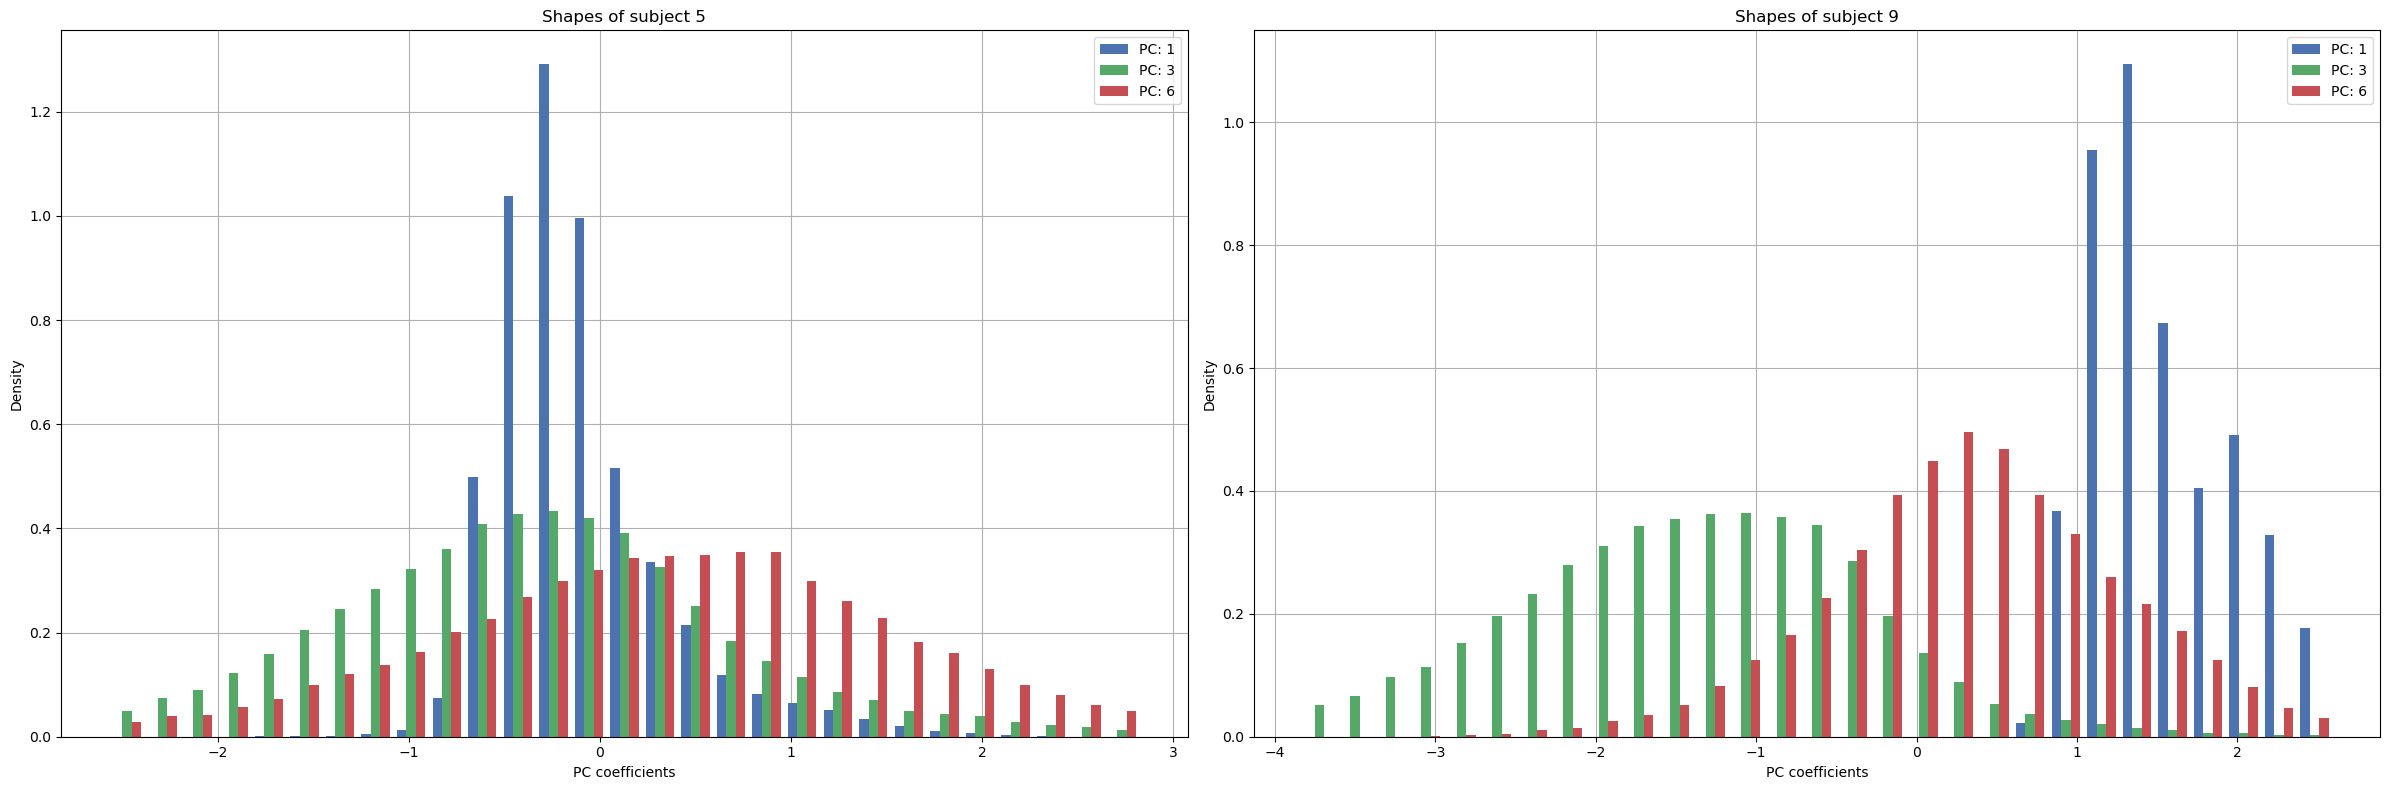

In [173]:
hist_shapes_h36m(['5','9'], smpl_params, [0,2,5], save_plot=True)

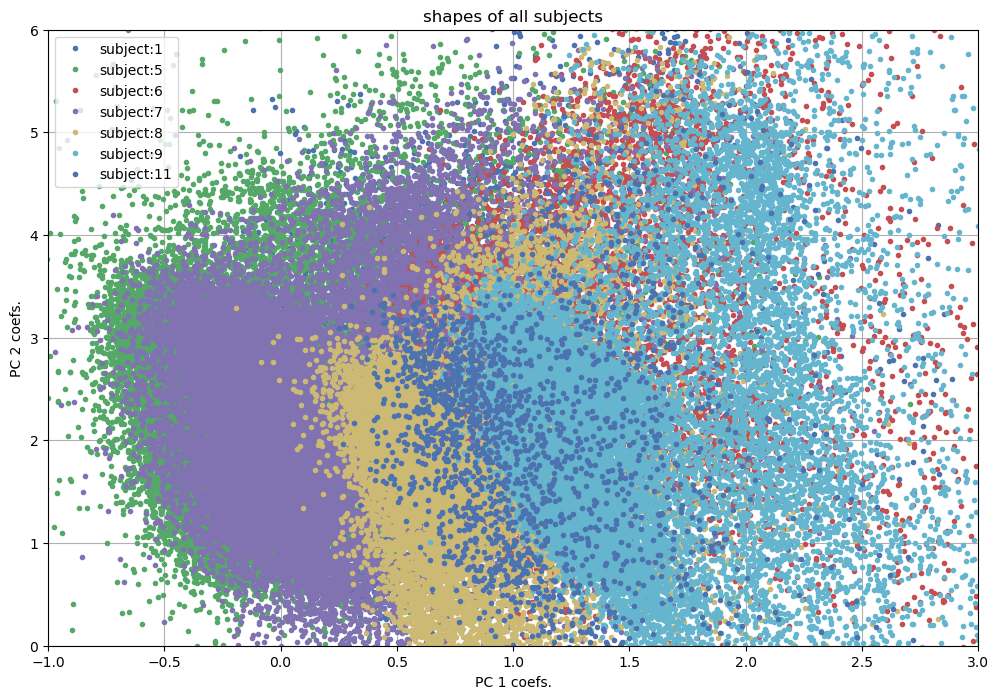

In [171]:
#plot_shapes_h36m(smpl_params, 0, 1)
plot_shapes_h36m(smpl_params, 0, 1, save_plot=True)
#plot_shapes_h36m(smpl_params, 4, 5)